<a href="https://colab.research.google.com/github/jazz-dev/solid-broccoli-AI/blob/main/Linear_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration = 1, Loss = 4266.987029896799
Iteration = 1, Loss = 521.102768295106
Iteration = 1, Loss = 69.68294895155
Iteration = 1, Loss = 15.281947450211183
Iteration = 2, Loss = 8.726034121374022
Iteration = 3, Loss = 7.935974599411187
Iteration = 4, Loss = 7.840763209089641
Iteration = 5, Loss = 7.829288580492172
Iteration = 6, Loss = 7.827905143023964
Iteration = 7, Loss = 7.827737803968319
Iteration = 8, Loss = 7.827717018068219
Iteration = 9, Loss = 7.827713893480687
Iteration = 10, Loss = 7.827712897335949
Iteration = 11, Loss = 7.827712157754151
Iteration = 12, Loss = 7.827711449153396
Iteration = 13, Loss = 7.827710744348602
Iteration = 14, Loss = 7.827710040063667
Iteration = 15, Loss = 7.827709335903777
Iteration = 16, Loss = 7.827708631821344
Iteration = 17, Loss = 7.827707927810632
Iteration = 18, Loss = 7.827707223870939
Iteration = 19, Loss = 7.827706520002179
Iteration = 20, Loss = 7.827705816204329


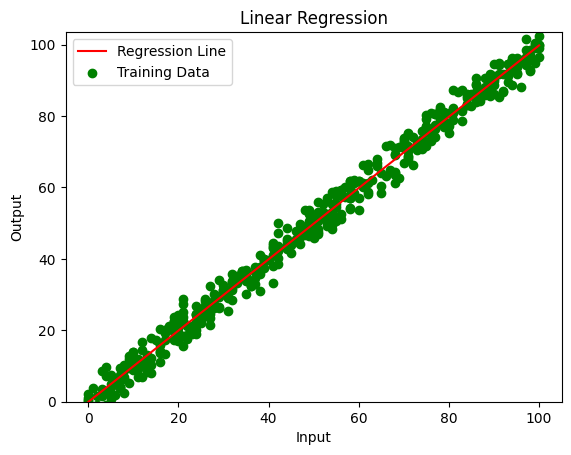

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

#drop the missing values
data = data.dropna()

#training datasets and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

#valid dataset and label
test_inputs = np.array(data.x[500:700]).reshape(199, 1)
test_outputs = np.array(data.y[500:700]).reshape(199, 1)

#build linear regression odel and plot regression line
class LinearRegression:
    def __init__(self):
       self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions)** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2*np.mean(np.multiply(df, train_input)) # cost function derivative wrt theta 2
        dc = 2*np.mean(df) # cost function derivative wrt theta 1
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives


    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0,1) * -1
        self.parameters['c'] = np.random.uniform(0,1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        # Show the plot
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        # Return parameters and loss
        return self.parameters, self.loss


# Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)








